In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Finishers Boston Marathon 2015, 2016 & 2017

In [8]:
# 데이터셋 info 확인

# 데이터 로드
df_15 = pd.read_csv('./data/marathon_results_2015.csv')
df_16 = pd.read_csv('./data/marathon_results_2016.csv')
df_17 = pd.read_csv('./data/marathon_results_2017.csv')
df_15['Year'] = 2015
df_16['Year'] = 2016
df_17['Year'] = 2017

# 3개년 데이터 병합
df = pd.concat([df_15, df_16, df_17], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79638 entries, 0 to 79637
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     53008 non-null  float64
 1   Bib            79638 non-null  object 
 2   Name           79638 non-null  object 
 3   Age            79638 non-null  int64  
 4   M/F            79638 non-null  object 
 5   City           79637 non-null  object 
 6   State          70645 non-null  object 
 7   Country        79638 non-null  object 
 8   Citizen        3440 non-null   object 
 9   Unnamed: 9     158 non-null    object 
 10  5K             79638 non-null  object 
 11  10K            79638 non-null  object 
 12  15K            79638 non-null  object 
 13  20K            79638 non-null  object 
 14  Half           79638 non-null  object 
 15  25K            79638 non-null  object 
 16  30K            79638 non-null  object 
 17  35K            79638 non-null  object 
 18  40K   

In [9]:
df.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Year,Unnamed: 8
0,0.0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,2015,NaN
1,1.0,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,2015,NaN
2,2.0,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,2015,NaN
3,3.0,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,2015,NaN
4,4.0,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,2015,NaN


In [10]:
# 불필요한 열 제거 (주, 시민권, 예상 기록 열 제거)
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 9', 'Unnamed: 8', 'State', 'Citizen', 'Proj Time'])
# df = df.drop(columns=['Unnamed: 0', 'Unnamed: 9', 'Unnamed: 8', 'City', 'Country', 'State', 'Citizen', 'Proj Time'])
list_timeseries = ['5K','10K', '15K', '20K', 'Half','25K', '30K', '35K', '40K', 'Pace', 'Official Time']

# 이후 수학적 연산을 위해, 문자열로 저장된 시간을 시간형 데이터로 변환 
for series in list_timeseries:
    df[series]= pd.to_timedelta(df[series], errors='coerce')

In [11]:
df.sample(5)

,Bib,Name,Age,M/F,City,Country,5K,10K,15K,20K,...,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
7109,12707,"Winkelman, Laurie A",33,F,Appleton,USA,0 days 00:23:51,0 days 00:47:27,0 days 01:10:50,0 days 01:34:23,...,0 days 01:57:46,0 days 02:21:48,0 days 02:46:00,0 days 03:09:39,0 days 00:07:39,0 days 03:20:24,7110,1099,927,2015
15848,21350,"Jordan, Therese",52,F,Clifton Park,USA,0 days 00:25:38,0 days 00:51:37,0 days 01:17:47,0 days 01:44:09,...,0 days 02:11:26,0 days 02:39:37,0 days 03:08:25,0 days 03:36:01,0 days 00:08:43,0 days 03:48:19,15849,5761,299,2015
26861,759,"Holroyd, Jason",39,M,Richmond Heights,USA,0 days 00:18:44,0 days 00:37:30,0 days 00:56:32,0 days 01:15:44,...,0 days 01:34:47,0 days 01:54:45,0 days 02:15:33,0 days 02:36:12,0 days 00:06:19,0 days 02:45:12,264,249,216,2016
37586,14223,"Kobayashi, Shigeya",57,M,Tokyo,JPN,0 days 00:24:35,0 days 00:49:12,0 days 01:14:04,0 days 01:39:10,...,0 days 02:04:30,0 days 02:31:32,0 days 03:00:13,0 days 03:29:00,0 days 00:08:25,0 days 03:40:31,10988,7752,485,2016
20927,20711,"Hill, Karen L",42,F,Rochester,USA,0 days 00:26:56,0 days 00:54:05,0 days 01:21:30,0 days 01:51:22,...,0 days 02:22:29,0 days 02:54:10,0 days 03:30:11,0 days 03:59:54,0 days 00:09:39,0 days 04:12:41,20928,8831,1579,2015


In [12]:
# (1:32:45)의 시간 데이터를 초 단위 float 값으로 변환해주는 함수
def sec_calculator(serie):
    list = []
    for i in range(len(serie)):
        list.append(serie[i].total_seconds())
    
    return list

# 나이(Age)를 기준으로 연령대 그룹(구간)으로 나누는 함수
def group_calculator(serie):
    list=[]
    for i in range(len(serie)):
        if serie[i]<20:
            list.append(20)
        elif serie[i]<30:
            list.append(30)
        elif serie[i]<40:
            list.append(40)
        elif serie[i]<60:
            list.append(60)
        elif serie[i]<80:
            list.append(80)
        else:
            list.append(100)
    
    return list
    
# 연령대 그룹 (20, 30, 40, 60, 80, 100) 생성 후, Age group 컬럼 생성
df['Age group']=pd.Series(group_calculator(df['Age']))

# Official Time을 시간 단위(float)로 변환하여 time_hour 컬럼 생성
df['Official Time Hour']=pd.Series(sec_calculator(df['Official Time']))/3600

# 각 거리(5K, 10K 등)별 시간 → 페이스(pace)로 변환
distance = ['5K','10K', '15K', '20K', 'Half','25K', '30K', '35K', '40K']
dist_pace = ['5p','10p', '15p', '20p', 'Halfp','25p', '30p', '35p', '40p']
numbers = [5,10,15,20,21.0975,25,30,35,40]

# 분/km 단위 페이스가 계산되어 새로운 컬럼에 저장됨
for dist, pace, n in zip(distance, dist_pace, numbers):
    df[pace]=pd.Series(sec_calculator(df[dist]))/(n*60)

In [13]:
df.sample(5)

,Bib,Name,Age,M/F,City,Country,5K,10K,15K,20K,...,Official Time Hour,5p,10p,15p,20p,Halfp,25p,30p,35p,40p
17868,19642,"Puckett, Wendy",46,F,Steamboat Springs,USA,0 days 00:26:32,0 days 00:53:28,0 days 01:20:38,0 days 01:47:45,...,3.925278,5.306667,5.346667,5.375556,5.387500,5.390844,5.416000,5.509444,5.562857,5.583333
9825,14638,"Martens, Barry",50,M,West Milton,USA,0 days 00:24:25,0 days 00:48:24,0 days 01:12:17,0 days 01:36:40,...,3.484722,4.883333,4.840000,4.818889,4.833333,4.838646,4.861333,4.892778,4.925714,4.947500
41176,15136,"Shoemaker, Sarah",43,F,Westlake Village,USA,0 days 00:26:36,0 days 00:53:00,0 days 01:19:26,0 days 01:46:13,...,3.872222,5.320000,5.300000,5.295556,5.310833,5.317376,5.320000,5.350556,5.443333,5.500417
5450,30245,"Aziz, Sharyar Jr.",26,M,New York,USA,0 days 00:24:42,0 days 00:46:12,0 days 01:07:35,0 days 01:29:14,...,3.226389,4.940000,4.620000,4.505556,4.461667,4.453134,4.454667,4.479444,4.523810,4.570417
15487,18300,"Allen, Julie",38,F,Scottsdale,USA,0 days 00:25:53,0 days 00:51:44,0 days 01:18:48,0 days 01:46:24,...,3.783333,5.176667,5.173333,5.253333,5.320000,5.307896,5.320000,5.351667,5.391429,5.384167


In [14]:
# 국가별 참가자 수 분석 (연도별)
country = df.groupby(by=['Country', 'Year']).agg({'M/F':'count'}).unstack()
print(country.sort_values(by=('M/F',2015), ascending=False).head(20))

             M/F                  
Year        2015     2016     2017
Country                           
USA      21880.0  21649.0  20945.0
CAN       2167.0   2134.0   1870.0
GBR        281.0    366.0    425.0
MEX        231.0    252.0    285.0
GER        176.0    171.0    226.0
ITA        155.0    154.0    165.0
JPN        136.0    185.0    170.0
AUS        132.0    152.0    191.0
FRA        101.0    102.0    114.0
BRA        101.0    122.0    205.0
KOR         88.0     89.0     88.0
NED         79.0     62.0     78.0
IRL         79.0     74.0     87.0
HKG         73.0     76.0     98.0
ESP         71.0     72.0    132.0
SWE         71.0     74.0     61.0
CHN         65.0    123.0    242.0
SUI         60.0     64.0     97.0
COL         57.0     56.0     61.0
DEN         49.0     58.0     60.0


In [15]:
# 국가별 최고 기록 분석 (성별별)
country_bestf = df[df['M/F']=='F'].groupby(by=['Country', 'Year']).agg({'Official Time': 'min'})
print('========Women results========\n', country_bestf.sort_values(by=('Official Time'), ascending = True).head(10))

country_bestm = df[df['M/F']=='M'].groupby(by=['Country', 'Year']).agg({'Official Time': 'min'})
print('\n========Men results========\n', country_bestm.sort_values(by=('Official Time'), ascending = True).head(10))

========Women results========
                Official Time
Country Year                
KEN     2017 0 days 02:21:52
BRN     2017 0 days 02:22:51
USA     2017 0 days 02:23:00
KEN     2015 0 days 02:24:55
ETH     2015 0 days 02:24:59
USA     2015 0 days 02:25:39
ETH     2016 0 days 02:29:19
BLR     2015 0 days 02:29:23
KEN     2016 0 days 02:30:50
ETH     2017 0 days 02:30:58

========Men results========
                Official Time
Country Year                
ETH     2015 0 days 02:09:17
KEN     2017 0 days 02:09:37
USA     2017 0 days 02:09:58
KEN     2015 0 days 02:10:22
JPN     2017 0 days 02:10:28
USA     2015 0 days 02:11:20
ETH     2016 0 days 02:12:45
UKR     2015 0 days 02:13:52
KEN     2016 0 days 02:14:05
ETH     2017 0 days 02:14:26


In [16]:
# City와 Country도 굳이 필요하지 않을것으로 판단 - 대체로 미국에 편향된 데이터 + 최고기록 정보에 아시아 국가도 포함되어 있음
df = df.drop(columns=['City', 'Country'])

In [17]:
# 연도별/성별 기록 통계 요약
# 연도+성별 그룹 → 최단, 최장, 평균, 참가자 수 계산
# 연도별로 남녀의 평균 시간, 최고 기록, 참가자 수 비교 가능
best_time = df.groupby(by=['Year', 'M/F']).agg({'Official Time': ['min', 'max', 'mean', 'count']}).unstack()
best_time

Official Time                                                  \
                 min                             max                   
M/F                F               M               F               M   
Year                                                                   
2015 0 days 02:24:55 0 days 02:09:17 0 days 07:59:33 0 days 08:06:01   
2016 0 days 02:29:19 0 days 02:12:45 0 days 10:30:23 0 days 08:25:09   
2017 0 days 02:21:52 0 days 02:09:37 0 days 07:19:37 0 days 07:58:14   

                                                                        
                          mean                            count         
M/F                          F                         M      F      M  
Year                                                                    
2015 0 days 03:58:21.553216276 0 days 03:36:35.526644263  12017  14581  
2016 0 days 04:05:54.004684803 0 days 03:45:54.571527345  12167  14463  
2017 0 days 04:09:05.478282659 0 days 03:48:54.688391744  11972  14438

In [18]:
# 구간별 기록 요약 통계
print('time on each distance')
print(df[['5K','10K', '15K', '20K', 'Half','25K', '30K', '35K', '40K', 'Official Time']].describe())
print('\n---------------------------------------------------------------------------\n')
print('average pace on each distance')
print(df[['5p','10p', '15p', '20p', 'Halfp','25p', '30p', '35p', '40p']].describe())

time on each distance
                              5K                        10K  \
count                      79409                      79524   
mean   0 days 00:25:27.392361067  0 days 00:50:56.006123937   
std    0 days 00:03:58.229184760  0 days 00:07:59.974720693   
min              0 days 00:14:43            0 days 00:29:43   
25%              0 days 00:22:35            0 days 00:45:11   
50%              0 days 00:24:57            0 days 00:49:52   
75%              0 days 00:27:34            0 days 00:55:12   
max              0 days 00:55:50            0 days 01:47:16   

                             15K                        20K  \
count                      79587                      79553   
mean   0 days 01:16:50.047306720  0 days 01:43:33.512727364   
std    0 days 00:12:16.051218760  0 days 00:16:59.400498602   
min              0 days 00:44:57            0 days 01:00:28   
25%              0 days 01:08:05            0 days 01:31:35   
50%              0 days 01:15:08

In [19]:
# 참가자 나이 분포(최소, 최대, 평균, 중앙값 등) 확인
df['Age'].describe()

count    79638.000000
mean        42.415166
std         11.355453
min         18.000000
25%         34.000000
50%         42.000000
75%         50.000000
max         84.000000
Name: Age, dtype: float64

In [20]:
IPython_default = plt.rcParams.copy()
plt.rc('axes.spines', top=False, right=False)
plt.rc('grid', color='lightgrey', linestyle='solid')
plt.rc('axes', titlesize=12, labelsize=10)

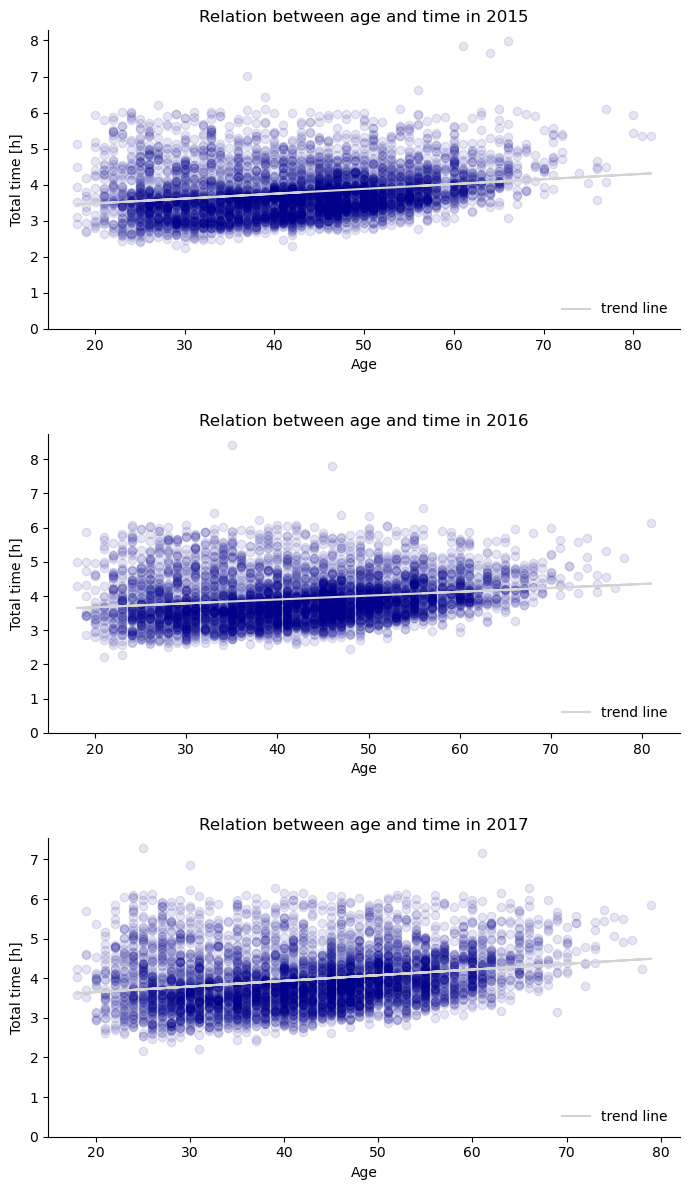

In [21]:
# 연도별로 참가자의 나이와 완주 시간의 관계 시각화 (산점도 + 추세선)
years = [2015, 2016, 2017]

fig, ax = plt.subplots(3,1, figsize=(7,12))

for i, year in zip(range(0,3), years):
    temp = df[df['Year']==year].sample(5000)
    x = temp['Age']
    y = temp['Official Time Hour']
    ax[i].scatter(x, y, alpha=0.1, color='darkblue')
    ax[i].set(title=f'Relation between age and time in {year}', xlabel='Age', ylabel='Total time [h]', ylim=(0))
    
    # trend line creation
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax[i].plot(x, p(x), c='lightgrey', label='trend line')
    ax[i].legend(frameon=False, loc='lower right' )
    
fig.tight_layout(h_pad=3.0)
plt.show()

In [22]:
# 성별 + 나이별 평균/최소/최대 완주시간 요약 (데이터 준비)
gender_avg_time = df.groupby(by=['Age','M/F']).agg({'Official Time Hour':['mean', 'min', 'max', 'count']}).unstack()
gender_avg_time

Official Time Hour                                                    \
                  mean                 min                 max             
M/F                  F         M         F         M         F         M   
Age                                                                        
18            4.570435  3.963255  3.507222  2.783056  6.053889  5.574444   
19            4.248690  3.762090  2.453889  2.453056  6.053889  7.075833   
20            4.198024  3.471911  3.045278  2.372500  6.026111  5.618333   
21            4.193039  3.553213  3.021667  2.212500  6.024722  5.778333   
22            4.194662  3.468872  2.788056  2.454444  6.025278  5.809444   
..                 ...       ...       ...       ...       ...       ...   
80            4.769167  4.962374  4.769167  4.236111  4.769167  5.998333   
81                 NaN  5.212667       NaN  4.446944       NaN  6.136111   
82            5.894444  5.204537  5.894444  4.300000  5.894444  5.965000   
83            5.748056  4.802778  5.748056  4.744167  5.748056  4.861389   
84            6.068611       NaN  6.068611       NaN  6.068611       NaN   

                   
     count         
M/F      F      M  
Age                
18    30.0   32.0  
19    70.0   67.0  
20   139.0  125.0  
21   253.0  236.0  
22   422.0  279.0  
..     ...    ...  
80     1.0   11.0  
81     NaN    5.0  
82     1.0    3.0  
83     1.0    2.0  
84     1.0    NaN  

[67 rows x 8 columns]

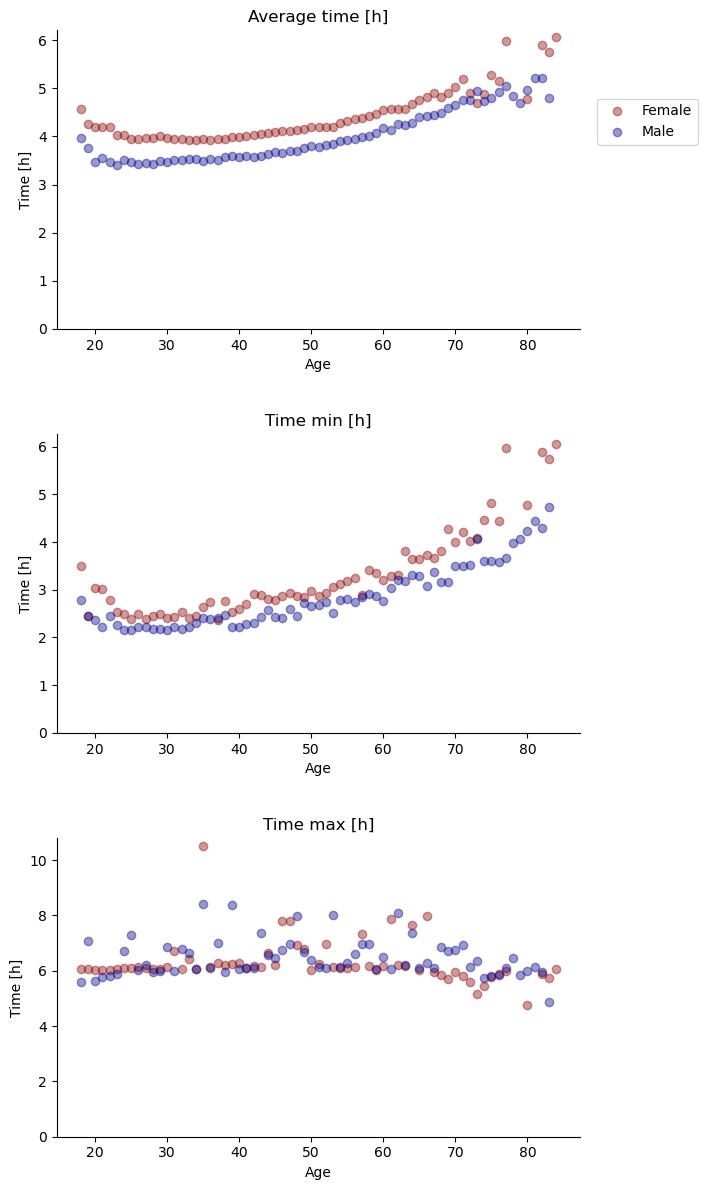

In [23]:
# 성별별 나이대에 따른 평균/최소/최대 완주 시간 시각화 (산점도)
fig, ax = plt.subplots(3,1, figsize=(6,12))
title = ['Average time [h]','Time min [h]','Time max [h]']
value = ['mean', 'min', 'max']
for i, v in zip(range(0,3), value):
    ax[i].scatter(gender_avg_time.index, gender_avg_time['Official Time Hour',v, 'F'], alpha=0.4, c='darkred')
    ax[i].scatter(gender_avg_time.index, gender_avg_time['Official Time Hour',v, 'M'], alpha=0.4, c='darkblue')
    ax[i].set(title=title[i], xlabel='Age', ylabel='Time [h]', ylim=(0))

fig.tight_layout(h_pad=3.0)
plt.legend(['Female', 'Male'], bbox_to_anchor=(1.02, 3.5), loc='upper left')
plt.show()

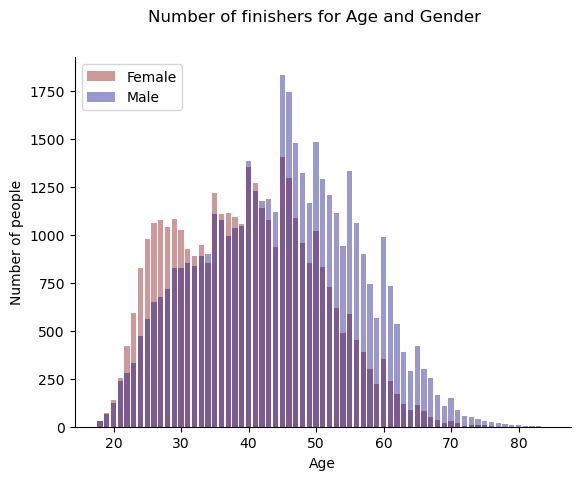

In [24]:
# 성별 + 나이별 참가자 수 시각화 (막대그래프)
fig, ax=plt.subplots()
ax.bar(gender_avg_time.index, gender_avg_time['Official Time Hour','count', 'F'], color='darkred', alpha=0.4)
ax.bar(gender_avg_time.index, gender_avg_time['Official Time Hour','count', 'M'], color='darkblue', alpha=0.4)

ax.set_xlabel('Age')
ax.set_ylabel('Number of people')

plt.suptitle('Number of finishers for Age and Gender')
plt.legend(['Female','Male'])
plt.show()

In [25]:
# 성별 + 연령대 그룹별 구간별 평균 페이스 데이터 요약 테이블
age_groups = df.groupby(by=['M/F', 'Age group']).agg({'5p':'mean', '10p':'mean', '15p':'mean', '20p':'mean', 
                                                 'Halfp':'mean', '25p':'mean', '30p':'mean', '35p':'mean', '40p':'mean'})
age_groups

5p       10p       15p       20p     Halfp       25p  \
M/F Age group                                                               
F   20         5.685185  5.675333  5.710617  5.791566  5.792858  5.885913   
    30         5.295875  5.288721  5.317424  5.379206  5.382141  5.443051   
    40         5.218052  5.220950  5.252645  5.310241  5.313026  5.367527   
    60         5.437805  5.455690  5.496022  5.558576  5.561813  5.622957   
    80         5.925748  6.003260  6.089842  6.197205  6.204458  6.297939   
    100        6.997500  7.135833  7.225833  7.335417  7.346447  7.420333   
M   20         4.919796  4.880404  4.890157  4.938401  4.940642  5.017960   
    30         4.533768  4.506278  4.515421  4.557232  4.560503  4.610816   
    40         4.629172  4.611879  4.625333  4.668122  4.671328  4.719457   
    60         4.895577  4.892400  4.915559  4.965309  4.969565  5.021584   
    80         5.513665  5.547370  5.595847  5.669115  5.676006  5.750639   
    100        6.194286  6.303571  6.394392  6.518929  6.531956  6.632698   

                    30p       35p       40p  
M/F Age group                                
F   20         6.003378  6.103071  6.174804  
    30         5.531250  5.624858  5.682656  
    40         5.453659  5.543496  5.596774  
    60         5.716754  5.812756  5.864645  
    80         6.421408  6.541441  6.601906  
    100        7.579861  7.713929  7.948958  
M   20         5.128726  5.287258  5.417075  
    30         4.696580  4.802113  4.893958  
    40         4.803387  4.901236  4.983731  
    60         5.113523  5.221779  5.306599  
    80         5.874707  6.011898  6.105299  
    100        6.784365  7.000159  7.127639

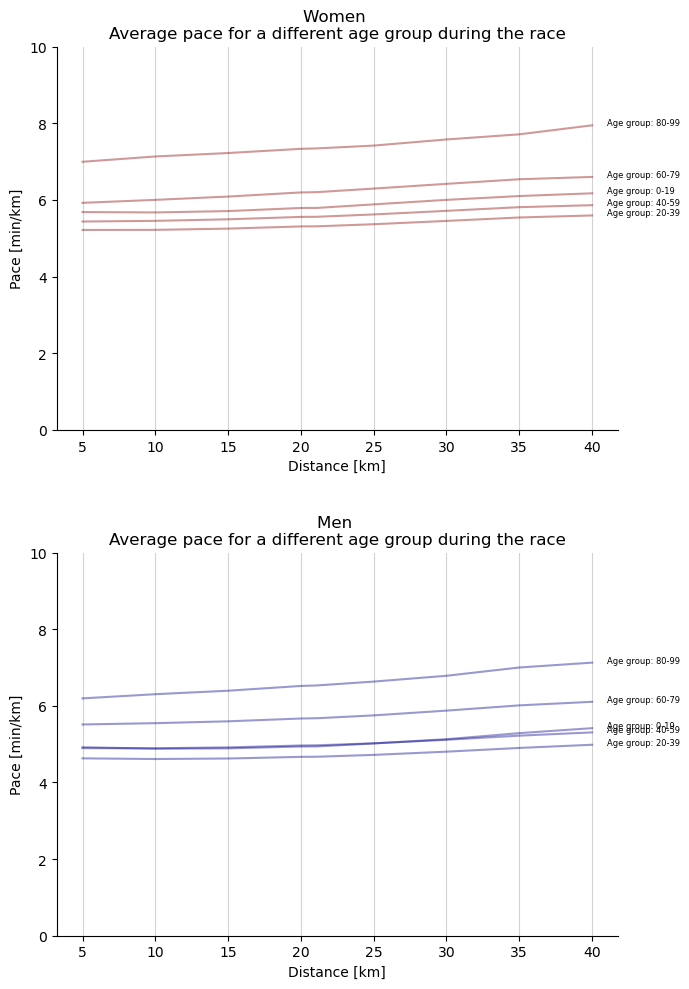

In [26]:
# 연령대별 성별 구간 평균 페이스 시각화 (라인 그래프)
age = [20,40,60,80, 100]
distance = [5,10,15,20,21.0975, 25,30,35,40]


fig, ax=plt.subplots(2, 1, figsize=(7,10))
for a in age:
    ax[0].plot(distance, age_groups.loc['F', a], label=f'Age group: {a-20}-{a-1}', color='darkred', alpha=0.4)
    ax[0].text(41,age_groups['40p']['F', a], f'Age group: {a-20}-{a-1}', fontsize=6)
    
for a in age:
    ax[1].plot(distance, age_groups.loc['M', a], label=f'Age group: {a-20}-{a-1}', color='darkblue', alpha=0.4)
    ax[1].text(41,age_groups['40p']['M', a], f'Age group: {a-20}-{a-1}', fontsize=6)
    
ax[0].set(ylim=(0,10), xlabel='Distance [km]', ylabel='Pace [min/km]', title='Women \nAverage pace for a different age group during the race')
ax[0].grid(axis='x')

ax[1].set(ylim=(0,10), xlabel='Distance [km]', ylabel='Pace [min/km]', title='Men \nAverage pace for a different age group during the race')
ax[1].grid(axis='x')

fig.tight_layout(h_pad=3.0)
plt.show()

In [27]:
# df.to_csv('temp.csv', index=False)

In [28]:
# 완주 기록 별 분류 (hour단위 - ex. sub-3: 3시간 이내)
def time_group(t):
    if t < 3.0:
        return "Sub-3"
    elif t < 4.0:
        return "Sub-4"
    elif t < 5.0:
        return "Sub-5"
    else:
        return "5h+"

df['target_group'] = df['Official Time Hour'].apply(time_group)


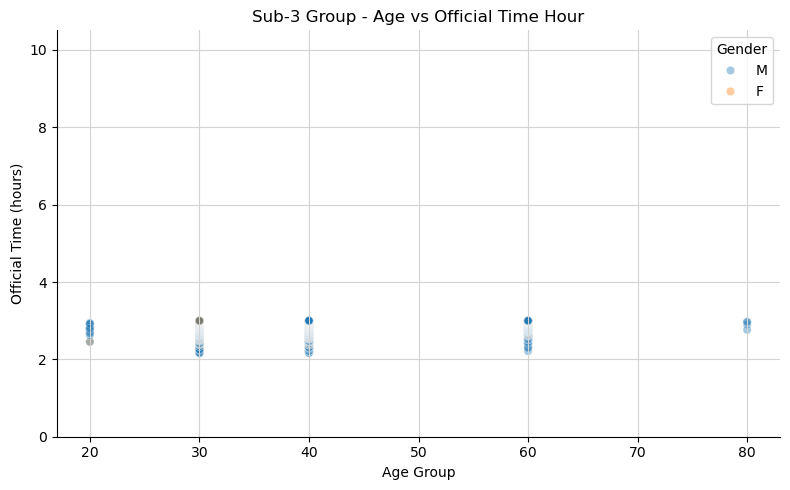

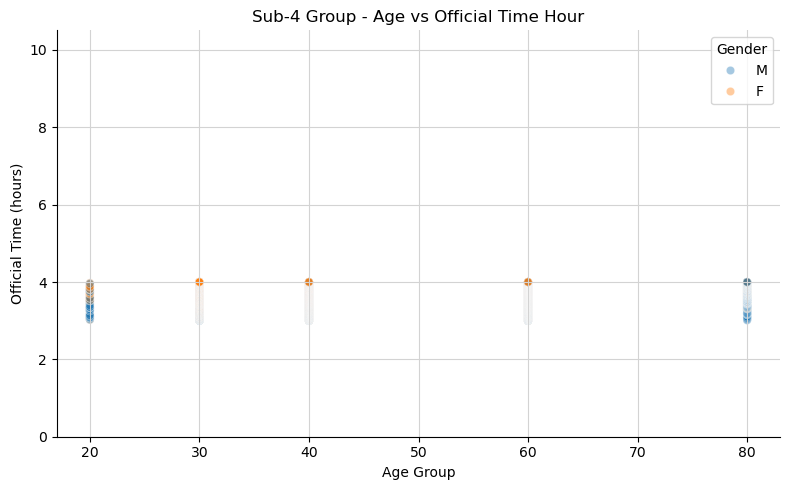

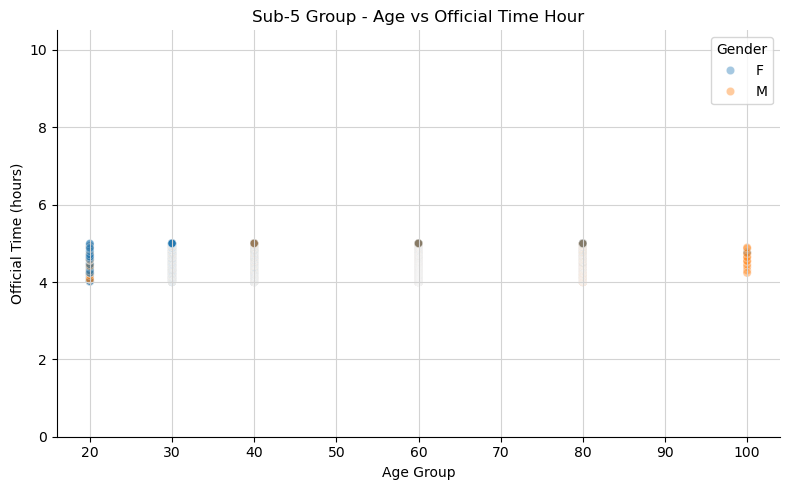

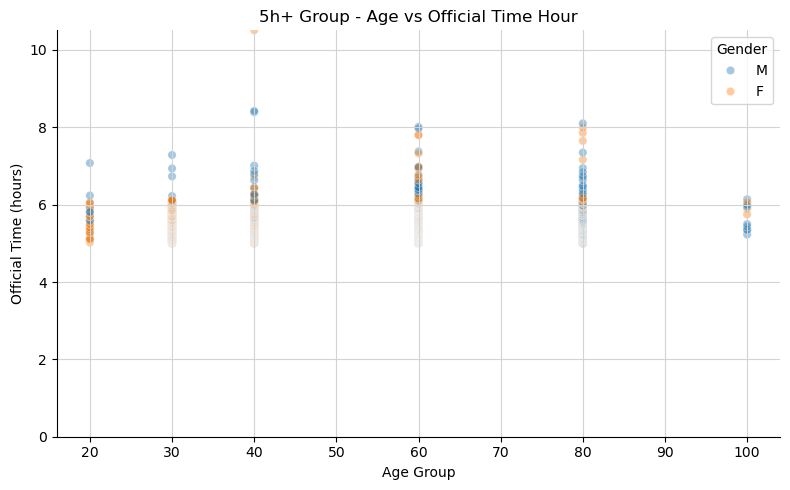

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 목표 그룹 함수 정의
def time_group(t):
    if t < 3.0:
        return "Sub-3"
    elif t < 4.0:
        return "Sub-4"
    elif t < 5.0:
        return "Sub-5"
    else:
        return "5h+"

# 그룹 컬럼 생성
df['target_group'] = df['Official Time Hour'].apply(time_group)

# 산점도: target_group별로 반복 시각화
target_groups = ['Sub-3', 'Sub-4', 'Sub-5', '5h+']

for group in target_groups:
    plt.figure(figsize=(8, 5))
    subset = df[df['target_group'] == group]
    
    sns.scatterplot(data=subset, x='Age group', y='Official Time Hour', hue='M/F', alpha=0.4)
    
    plt.title(f'{group} Group - Age vs Official Time Hour')
    plt.xlabel('Age Group')
    plt.ylabel('Official Time (hours)')
    plt.legend(title='Gender')
    plt.ylim(0, df['Official Time Hour'].max())
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [30]:
# 모든 결측값을 포함한 행 제거
df = df.dropna().reset_index(drop=True)


In [31]:
# 문자열로 변환 후 'F' 제거, 숫자로 변환
df['Bib'] = df['Bib'].astype(str).str.replace('F', '', regex=False)
df['Bib'] = pd.to_numeric(df['Bib'], errors='coerce')

df.head()


,Bib,Name,Age,M/F,5K,10K,15K,20K,Half,25K,...,5p,10p,15p,20p,Halfp,25p,30p,35p,40p,target_group
0,3,"Desisa, Lelisa",25,M,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,0 days 01:04:02,0 days 01:16:07,...,2.943333,2.971667,2.996667,3.024167,3.035115,3.044667,3.066667,3.085238,3.066250,Sub-3
1,4,"Tsegay, Yemane Adhane",30,M,0 days 00:14:43,0 days 00:29:43,0 days 00:44:58,0 days 01:00:28,0 days 01:04:01,0 days 01:16:07,...,2.943333,2.971667,2.997778,3.023333,3.034325,3.044667,3.066111,3.085238,3.067500,Sub-3
2,8,"Chebet, Wilson",29,M,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,0 days 01:04:02,0 days 01:16:07,...,2.943333,2.971667,2.996667,3.024167,3.035115,3.044667,3.066667,3.085238,3.075417,Sub-3
3,11,"Kipyego, Bernard",28,M,0 days 00:14:43,0 days 00:29:44,0 days 00:45:01,0 days 01:00:29,0 days 01:04:02,0 days 01:16:07,...,2.943333,2.973333,3.001111,3.024167,3.035115,3.044667,3.066667,3.087143,3.094583,Sub-3
4,10,"Korir, Wesley",32,M,0 days 00:14:43,0 days 00:29:44,0 days 00:44:58,0 days 01:00:28,0 days 01:04:01,0 days 01:16:07,...,2.943333,2.973333,2.997778,3.023333,3.034325,3.044667,3.066667,3.085238,3.086250,Sub-3


In [32]:
df.to_csv('temp.csv', index=False)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79038 entries, 0 to 79037
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Bib                 79038 non-null  int64          
 1   Name                79038 non-null  object         
 2   Age                 79038 non-null  int64          
 3   M/F                 79038 non-null  object         
 4   5K                  79038 non-null  timedelta64[ns]
 5   10K                 79038 non-null  timedelta64[ns]
 6   15K                 79038 non-null  timedelta64[ns]
 7   20K                 79038 non-null  timedelta64[ns]
 8   Half                79038 non-null  timedelta64[ns]
 9   25K                 79038 non-null  timedelta64[ns]
 10  30K                 79038 non-null  timedelta64[ns]
 11  35K                 79038 non-null  timedelta64[ns]
 12  40K                 79038 non-null  timedelta64[ns]
 13  Pace                79038 non-n

# Running Calorie Burn Dataset

In [52]:
import pandas as pd

data = pd.read_csv('./data/calories_burned_data.csv')

In [53]:
data.head(3)

,Gender,Age,Height(cm),Weight(kg),BMI,Running Time(min),Running Speed(km/h),Distance(km),Average Heart Rate,Calories Burned
0,Male,49,184,74,20.4,78,9.5,3.00,139,973
1,Female,56,182,70,23.2,98,10.2,5.23,165,494
2,Male,49,170,85,27.4,91,10.4,7.61,134,954


In [54]:
# 데이터 확인
data.info()
data.describe()
# 결측치 개수 확인
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               200 non-null    object 
 1   Age                  200 non-null    int64  
 2   Height(cm)           200 non-null    int64  
 3   Weight(kg)           200 non-null    int64  
 4   BMI                  200 non-null    float64
 5   Running Time(min)    200 non-null    int64  
 6   Running Speed(km/h)  200 non-null    float64
 7   Distance(km)         200 non-null    float64
 8   Average Heart Rate   200 non-null    int64  
 9   Calories Burned      200 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 15.8+ KB


Gender                 0
Age                    0
Height(cm)             0
Weight(kg)             0
BMI                    0
Running Time(min)      0
Running Speed(km/h)    0
Distance(km)           0
Average Heart Rate     0
Calories Burned        0
dtype: int64

In [55]:
# # 결측치 처리

# # 수치형 데이터 → 평균 또는 중앙값으로 대체
# num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# for col in num_cols:
#     data[col] = data[col].fillna(data[col].median())

# # 범주형 데이터(gender) → 최빈값으로 대체
# data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [56]:
print(data.head())

   Gender  Age  Height(cm)  Weight(kg)   BMI  Running Time(min)  \
0    Male   49         184          74  20.4                 78   
1  Female   56         182          70  23.2                 98   
2    Male   49         170          85  27.4                 91   
3    Male   21         181          59  24.0                 89   
4    Male   47         172          86  29.8                 79   

   Running Speed(km/h)  Distance(km)  Average Heart Rate  Calories Burned  
0                  9.5          3.00                 139              973  
1                 10.2          5.23                 165              494  
2                 10.4          7.61                 134              954  
3                 13.4         14.19                 144              570  
4                  9.8          3.84                 149              385  


In [57]:
# 컬럼명을 사용하기 편하게 소문자 + 언더스코어로 변경
data = data.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Height(cm)': 'height_cm',
    'Weight(kg)': 'weight_kg',
    'BMI': 'bmi',
    'Running Time(min)': 'running_time_min',
    'Running Speed(km/h)': 'running_speed_kmh',
    'Distance(km)': 'distance_km',
    'Average Heart Rate': 'average_heart_rate',
    'Calories Burned': 'calories_burned'
})

In [58]:
print(data.head())

   gender  age  height_cm  weight_kg   bmi  running_time_min  \
0    Male   49        184         74  20.4                78   
1  Female   56        182         70  23.2                98   
2    Male   49        170         85  27.4                91   
3    Male   21        181         59  24.0                89   
4    Male   47        172         86  29.8                79   

   running_speed_kmh  distance_km  average_heart_rate  calories_burned  
0                9.5         3.00                 139              973  
1               10.2         5.23                 165              494  
2               10.4         7.61                 134              954  
3               13.4        14.19                 144              570  
4                9.8         3.84                 149              385  


In [59]:
# 신체 + 러닝 관련 변수 선택
corr_data = data[['age', 'height_cm', 'weight_kg', 'bmi',
                  'running_time_min', 'running_speed_kmh', 'distance_km']]

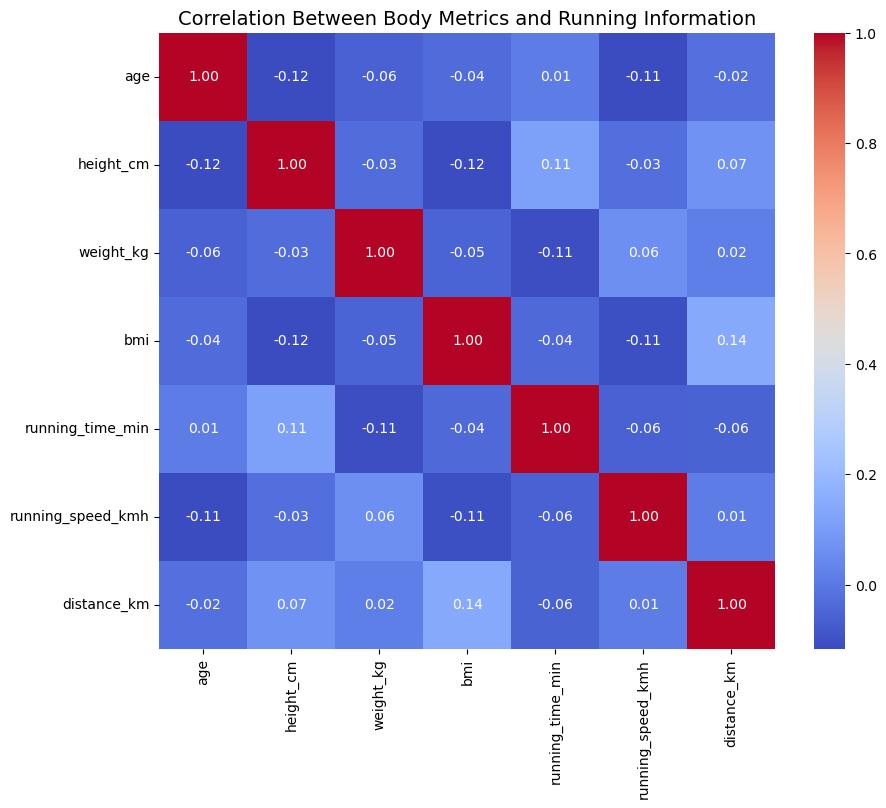

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 계산
corr = corr_data.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Between Body Metrics and Running Information", fontsize=14)
plt.show()

age vs running_speed_kmh
: 나이가 많을수록 속도가 약간 감소하는 경향이 있음

bmi vs distance_km
: BMI가 높은 사람이 약간 더 먼 거리를 달리는 경향 있음 (의외 결과) - BMI가 오직 키와 체중으로만 계산하는 수치이기에 근육이 많은 체형일 수 있다.

height_cm vs running_time_min
: 키가 클수록 러닝 시간이 길어지는 경향이 조금 있음

weight_kg vs running_speed_kmh
: 무게와 속도는 거의 무관